# Importando Libs...

In [ ]:
# Lib manipulação dos dados
import pandas as pd
import numpy as np
import math

# Analise Gráfica
import matplotlib.pyplot as plt

# Lib para modelagem
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Start Config
pd.set_option("max_colwidth", 1000)
pd.set_option("max_rows", 200)
pd.set_option("max_columns", 200)
pd.set_option("precision", 2)
pd.options.display.float_format = "{:,.2f}".format

# Preparando dados...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def plot_resultados_regressao(ax, y_test, y_pred, titulo, scores):
  ax.plot([y_test.min(), y_test.max()],
          [y_test.min(), y_test.max()],
          '--r', linewidth=2)
  ax.scatter(y_test[:100000], y_pred[:100000], alpha=0.2, c='rebeccapurple', s=38)

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
  ax.spines['left'].set_position(('outward', 10))
  ax.spines['bottom'].set_position(('outward', 10))
  ax.set_xlim([y_test.min(), y_test.max()])
  ax.set_ylim([y_test.min(), y_test.max()])
  ax.set_xlabel('Verdadeiras notas')
  ax.set_ylabel('Notas preditas')
  label = plt.Rectangle((0,0), 0, 0, fc='w', fill=False, edgecolor='none', linewidth=0)

  ax.legend([label], [scores], loc='upper left')
  ax.set_title(titulo)

def plot_resultados_comparacao(y_prev, y_test, titulo, scores):
    plt.figure(figsize=(20,10))

    plt.title('Gráfico de comparação de predições:'+titulo)
    plt.xlabel(str(scores))
    plt.ylabel('Notas')

    plt.plot(range(len(y_test[:100])),y_test[:100],color='red',linestyle='-.', label = 'Esperada', linewidth= 2.0)
    plt.plot(range(len(y_prev[:100])),y_prev[:100],color='navy',linestyle='solid',label='Predição', linewidth= 3.0)
    plt.legend(prop={'size': 20})
    plt.show()

In [ ]:
#Utilizar o CSV "dataFramePresentes.csv". Colocando o CSV no Drive pessoal
dfP = pd.read_csv("/content/drive/MyDrive/dataFramePresentes.csv", usecols=['CO_UF_RESIDENCIA'
, 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', "TP_ST_CONCLUSAO", "NU_NOTA_CN", "NU_NOTA_CH"
, "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "Q001", "Q002", "Q006"])

In [ ]:
dfP = dfP[(dfP["NU_NOTA_MT"] > 0) & (dfP["NU_NOTA_CH"] > 0) & (dfP['NU_NOTA_CN'] > 0) & (dfP['NU_NOTA_LC'] > 0)]

In [ ]:
dfP = dfP.dropna()

In [ ]:
dfP

,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Q001,Q002,Q006
0,17,25,F,1,1,1,483.80,503.60,537.30,392.00,460.00,120.00,120.00,120.00,100.00,0.00,C,E,E
1,31,22,F,1,1,1,513.60,575.50,570.70,677.00,860.00,160.00,120.00,180.00,200.00,200.00,E,E,G
2,51,37,M,2,1,1,563.70,644.90,564.20,675.30,800.00,160.00,200.00,180.00,180.00,80.00,B,B,E
3,29,22,F,3,1,1,484.60,488.40,507.20,594.70,600.00,140.00,120.00,120.00,160.00,60.00,E,B,B
4,35,17,M,1,2,2,543.90,548.10,502.50,480.70,400.00,120.00,40.00,120.00,120.00,0.00,E,E,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931503,51,20,M,1,1,1,391.20,427.30,497.30,531.10,540.00,120.00,120.00,100.00,80.00,120.00,B,E,G
3931504,22,37,F,4,1,1,414.60,485.90,406.60,423.40,480.00,100.00,120.00,80.00,100.00,80.00,A,A,C
3931505,35,17,F,1,2,2,370.30,407.40,506.70,390.70,460.00,100.00,120.00,120.00,120.00,0.00,E,E,B
3931506,15,33,F,3,1,1,499.60,507.80,537.00,498.30,540.00,120.00,120.00,80.00,120.00,100.00,H,E,E


In [ ]:
dfP.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3698701 entries, 0 to 3931507
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   CO_UF_RESIDENCIA  3698701 non-null  int64  
 1   NU_IDADE          3698701 non-null  int64  
 2   TP_SEXO           3698701 non-null  object 
 3   TP_COR_RACA       3698701 non-null  int64  
 4   TP_ESCOLA         3698701 non-null  int64  
 5   TP_ST_CONCLUSAO   3698701 non-null  int64  
 6   NU_NOTA_CN        3698701 non-null  float64
 7   NU_NOTA_CH        3698701 non-null  float64
 8   NU_NOTA_LC        3698701 non-null  float64
 9   NU_NOTA_MT        3698701 non-null  float64
 10  NU_NOTA_REDACAO   3698701 non-null  float64
 11  NU_NOTA_COMP1     3698701 non-null  float64
 12  NU_NOTA_COMP2     3698701 non-null  float64
 13  NU_NOTA_COMP3     3698701 non-null  float64
 14  NU_NOTA_COMP4     3698701 non-null  float64
 15  NU_NOTA_COMP5     3698701 non-null  float64
 16  

In [ ]:
dfP.corr()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_ESCOLA,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
CO_UF_RESIDENCIA,1.00,-0.06,-0.24,0.07,0.07,0.14,0.14,0.16,0.14,0.06,0.08,0.04,0.05,0.04,0.05
NU_IDADE,-0.06,1.00,0.06,-0.30,-0.47,-0.06,-0.03,-0.08,-0.14,-0.17,-0.14,-0.13,-0.14,-0.17,-0.15
TP_COR_RACA,-0.24,0.06,1.00,-0.07,-0.09,-0.19,-0.19,-0.20,-0.20,-0.13,-0.13,-0.10,-0.12,-0.11,-0.11
TP_ESCOLA,0.07,-0.30,-0.07,1.00,0.34,0.05,0.04,0.04,0.09,0.09,0.06,0.07,0.07,0.09,0.09
TP_ST_CONCLUSAO,0.07,-0.47,-0.09,0.34,1.00,0.00,-0.01,-0.01,0.05,-0.00,0.00,-0.02,-0.01,0.01,0.01
NU_NOTA_CN,0.14,-0.06,-0.19,0.05,0.00,1.00,0.68,0.65,0.65,0.51,0.43,0.41,0.47,0.44,0.46
NU_NOTA_CH,0.14,-0.03,-0.19,0.04,-0.01,0.68,1.00,0.75,0.62,0.54,0.47,0.44,0.49,0.46,0.48
NU_NOTA_LC,0.16,-0.08,-0.20,0.04,-0.01,0.65,0.75,1.00,0.60,0.55,0.50,0.44,0.50,0.47,0.49
NU_NOTA_MT,0.14,-0.14,-0.20,0.09,0.05,0.65,0.62,0.60,1.00,0.50,0.43,0.40,0.45,0.44,0.45
NU_NOTA_REDACAO,0.06,-0.17,-0.13,0.09,-0.00,0.51,0.54,0.55,0.50,1.00,0.84,0.89,0.93,0.89,0.85


In [ ]:
df = dfP[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_COMP3", "NU_NOTA_COMP5", "Q006"]]

In [ ]:
df["MEDIA_GERAL"] = (df["NU_NOTA_CN"] + df["NU_NOTA_CH"] + df["NU_NOTA_LC"] + df["NU_NOTA_MT"] +
                          df["NU_NOTA_REDACAO"])/5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X = df.drop(["NU_NOTA_MT"], axis=1)

y = df["NU_NOTA_MT"].copy()

## Modelo Gradient Boost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
model_GR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50, max_depth=6)

In [ ]:
le = LabelEncoder()
X_train["Q006"] = le.fit_transform(X_train["Q006"])
X_test["Q006"] = le.fit_transform(X_test["Q006"])

In [ ]:
model_GR.fit( X_train, y_train )

GradientBoostingRegressor(max_depth=6, n_estimators=50)

In [ ]:
pred_train_GR = model_GR.predict( X_train )
pred_test_GR = model_GR.predict( X_test )

In [ ]:
print(f'R² Treino: {r2_score(y_train, pred_train_GR)}')
print(f'R² Teste: {r2_score(y_test, pred_test_GR)}')

R² Treino: 0.9247643427399289
R² Teste: 0.9242266554446978


In [ ]:
# Treino - MAE, MAPE
mae_train_GR = mean_absolute_error( y_train, pred_train_GR )
mape_train_GR = np.mean( np.abs( (y_train - pred_train_GR) / y_train ) )

# Teste - MAE, MAPE
mae_test_GR = mean_absolute_error( y_test, pred_test_GR )
mape_test_GR = np.mean( np.abs( (y_test - pred_test_GR) / y_test ) )

In [ ]:
data = {
    'Dataframe': ['Treino', 'Teste'],
    'MAE': [mae_train_GR, mae_test_GR],
    'MAPE': [mape_train_GR, mape_test_GR] 
}
pd.DataFrame( data )

,Dataframe,MAE,MAPE
0,Treino,22.96,0.05
1,Teste,23.04,0.05


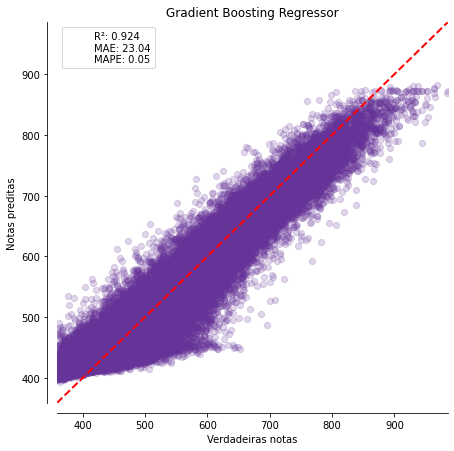

In [ ]:
fig, axs = plt.subplots(figsize=(7,7))
axs = np.ravel(axs)

for ax in axs:
  plot_resultados_regressao(ax, y_test, pred_test_GR, 'Gradient Boosting Regressor', f'R²: {round(r2_score(y_test, pred_test_GR), 3)}\nMAE: {round(mae_test_GR, 2)}\nMAPE: {round(mape_test_GR, 2)}')

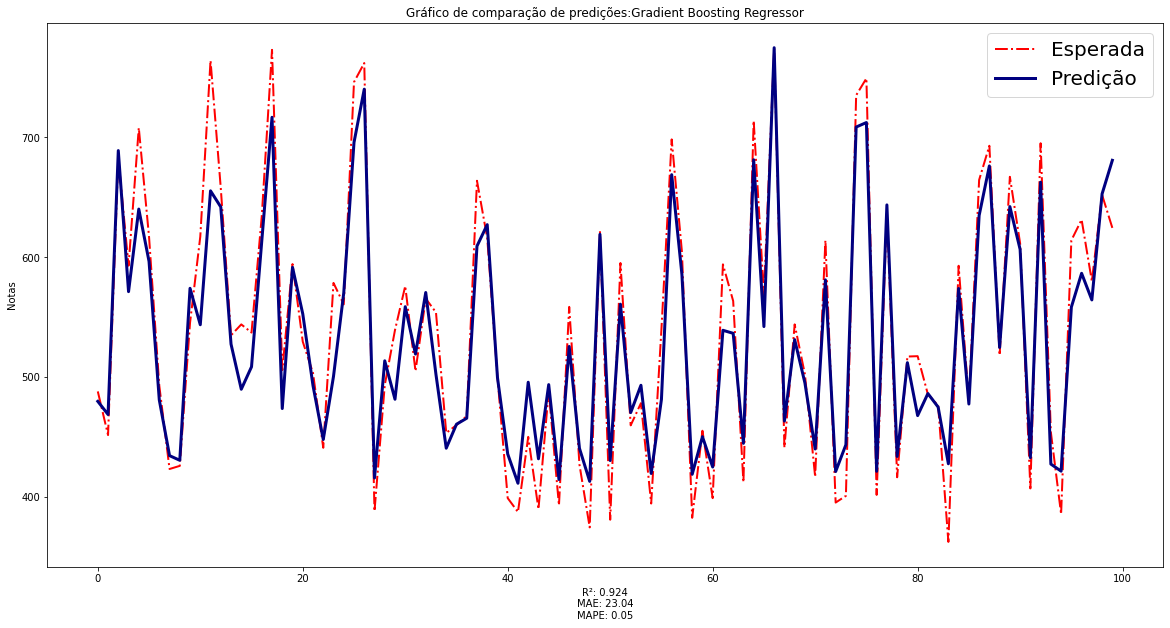

In [ ]:
plot_resultados_comparacao(pred_test_GR, y_test, 'Gradient Boosting Regressor', f'R²: {round(r2_score(y_test, pred_test_GR), 3)}\nMAE: {round(mae_test_GR, 2)}\nMAPE: {round(mape_test_GR, 2)}')

## Modelo Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
model_RF = RandomForestRegressor(max_depth=10, random_state=42, n_jobs=-1, n_estimators= 50)

In [ ]:
le = LabelEncoder()
X_train["Q006"] = le.fit_transform(X_train["Q006"])
X_test["Q006"] = le.fit_transform(X_test["Q006"])

In [ ]:
model_RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
pred_train_RF = model_RF.predict( X_train )
pred_test_RF = model_RF.predict( X_test )

In [ ]:
print(f'R² Treino: {r2_score(y_train, pred_train_RF)}')
print(f'R² Teste: {r2_score(y_test, pred_test_RF)}')

R² Treino: 0.8940806397020409
R² Teste: 0.8924662097862816


In [ ]:
# Treino - MAE, MAPE
mae_train_RF = mean_absolute_error( y_train, pred_train_RF )
mape_train_RF = np.mean( np.abs( (y_train - pred_train_RF) / y_train ) )

# Teste - MAE, MAPE
mae_test_RF = mean_absolute_error( y_test, pred_test_RF )
mape_test_RF = np.mean( np.abs( (y_test - pred_test_RF) / y_test ) )

In [ ]:
data = {
    'Dataframe': ['Treino', 'Teste'],
    'MAE': [mae_train_RF, mae_test_RF],
    'MAPE': [mape_train_RF, mape_test_RF] 
}
pd.DataFrame( data )

,Dataframe,MAE,MAPE
0,Treino,27.86,0.06
1,Teste,28.07,0.06


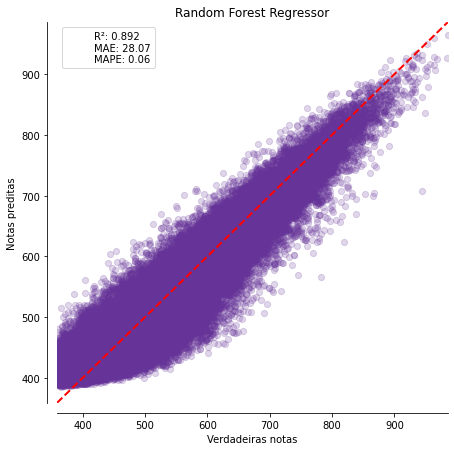

In [ ]:
fig, axs = plt.subplots(figsize=(7,7))
axs = np.ravel(axs)

for ax in axs:
  plot_resultados_regressao(ax, y_test, pred_test_RF, 'Random Forest Regressor', f'R²: {round(r2_score(y_test, pred_test_RF), 3)}\nMAE: {round(mae_test_RF, 2)}\nMAPE: {round(mape_test_RF, 2)}')

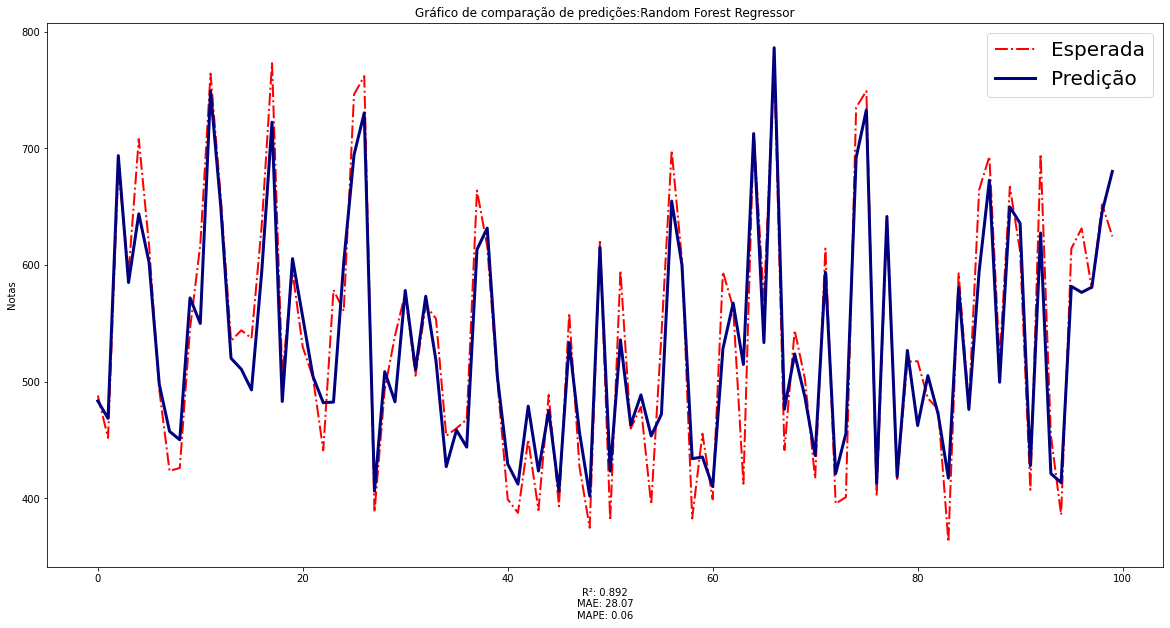

In [ ]:
plot_resultados_comparacao(pred_test_RF, y_test, 'Random Forest Regressor', f'R²: {round(r2_score(y_test, pred_test_RF), 3)}\nMAE: {round(mae_test_RF, 2)}\nMAPE: {round(mape_test_RF, 2)}')

## Modelo K-Nearest Neighbors (KNN)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
model_KNN = KNeighborsRegressor(n_neighbors = 3, n_jobs=-1, p=2, leaf_size=40)

In [ ]:
le = LabelEncoder()
X_train["Q006"] = le.fit_transform(X_train["Q006"])
X_test["Q006"] = le.fit_transform(X_test["Q006"])

In [ ]:
model_KNN.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=40, n_jobs=-1, n_neighbors=3)

In [ ]:
pred_train_KNN = model_KNN.predict( X_train )
pred_test_KNN = model_KNN.predict( X_test )

In [ ]:
print(f'R² Treino: {r2_score(y_train, pred_train_KNN)}')
print(f'R² Teste: {r2_score(y_test, pred_test_KNN)}')

R² Treino: 0.9801674952310336
R² Teste: 0.9605754150511299


In [ ]:
# Treino - MAE, MAPE
mae_train_KNN = mean_absolute_error( y_train, pred_train_KNN )
mape_train_KNN = np.mean( np.abs( (y_train - pred_train_KNN) / y_train ) )

# Teste - MAE, MAPE
mae_test_KNN = mean_absolute_error( y_test, pred_test_KNN )
mape_test_KNN = np.mean( np.abs( (y_test - pred_test_KNN) / y_test ) )

In [ ]:
data = {
    'Dataframe': ['Treino', 'Teste'],
    'MAE': [mae_train_KNN, mae_test_KNN],
    'MAPE': [mape_train_KNN, mape_test_KNN] 
}
pd.DataFrame( data )

,Dataframe,MAE,MAPE
0,Treino,11.37,0.02
1,Teste,15.93,0.03


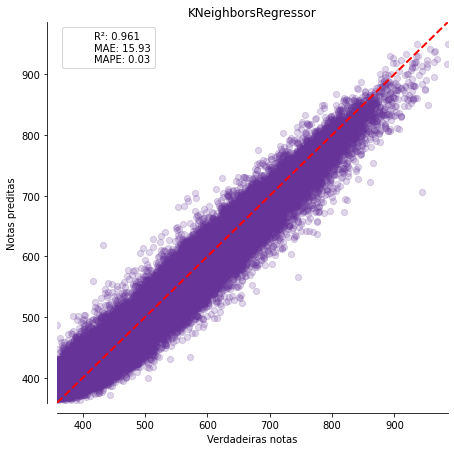

In [ ]:
fig, axs = plt.subplots(figsize=(7,7))
axs = np.ravel(axs)

for ax in axs:
  plot_resultados_regressao(ax, y_test, pred_test_KNN, 'KNeighborsRegressor', f'R²: {round(r2_score(y_test, pred_test_KNN), 3)}\nMAE: {round(mae_test_KNN, 2)}\nMAPE: {round(mape_test_KNN, 2)}')

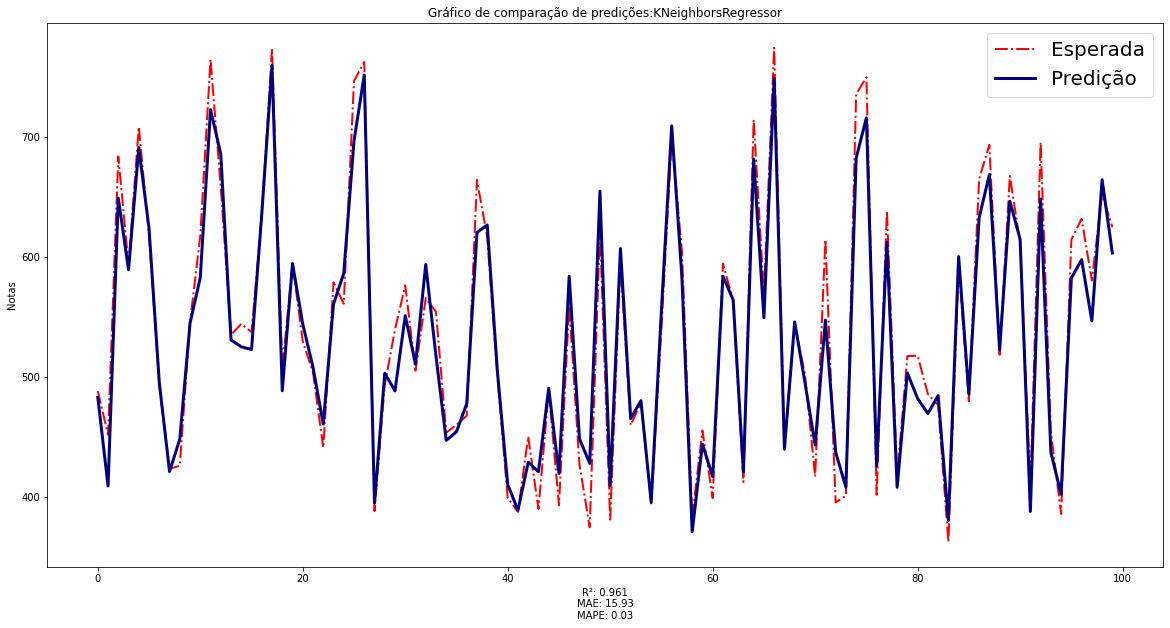

In [ ]:
plot_resultados_comparacao(pred_test_KNN, y_test, 'KNeighborsRegressor', f'R²: {round(r2_score(y_test, pred_test_KNN), 3)}\nMAE: {round(mae_test_KNN, 2)}\nMAPE: {round(mape_test_KNN, 2)}')

## Comite...

### Comite 01

In [ ]:
test = [[502.50,565.40,497.60,560.00,120.00,80.00,2,529.06]]
resp = [519.80]

In [ ]:
pred_GR = model_GR.predict(test) #515.5581914
pred_RF = model_RF.predict(test) #506.58638754
pred_KNN = model_KNN.predict(test) #529.96666667

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
pred_media = (pred_GR + pred_RF + pred_KNN) / 3

In [ ]:
print(f'Comitê decidiu pelo valor: {pred_media} - MAE: {mean_absolute_error( resp, pred_media )}')
print(f'\nRespostas dos integrantes: \nGradient Boosting Regressor : {pred_GR} - MAE: {mean_absolute_error( resp, pred_GR )} \nRandom Forest Regressor: {pred_RF} - MAE: {mean_absolute_error( resp, pred_RF )} \nKNN: {pred_KNN} - MAE: {mean_absolute_error( resp, pred_KNN )}')

Comitê decidiu pelo valor: [517.3704152] - MAE: 2.4295847992782456

Respostas dos integrantes: 
Gradient Boosting Regressor : [515.5581914] - MAE: 4.241808603339109 
Random Forest Regressor: [506.58638754] - MAE: 13.213612461162427 
KNN: [529.96666667] - MAE: 10.166666666666629


### Comite 02

In [ ]:
test = [[622.50,585.40,502.60,740.00,120.00,120.00,2,594.06]]
resp = [519.80]

In [ ]:
pred_GR = model_GR.predict(test) #561.886904
pred_RF = model_RF.predict(test) #555.92013829
pred_KNN = model_KNN.predict(test) #558.76666667

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
pred_media = (pred_GR + pred_RF + pred_KNN) / 3

In [ ]:
print(f'Comitê decidiu pelo valor: {pred_media} - MAE: {mean_absolute_error( resp, pred_media )}')
print(f'\nRespostas dos integrantes: \nGradient Boosting Regressor : {pred_GR} - MAE: {mean_absolute_error( resp, pred_GR )} \nRandom Forest Regressor: {pred_RF} - MAE: {mean_absolute_error( resp, pred_RF )} \nKNN: {pred_KNN} - MAE: {mean_absolute_error( resp, pred_KNN )}')

Comitê decidiu pelo valor: [558.85790299] - MAE: 39.05790298662123

Respostas dos integrantes: 
Gradient Boosting Regressor : [561.886904] - MAE: 42.086904000810364 
Random Forest Regressor: [555.92013829] - MAE: 36.12013829238663 
KNN: [558.76666667] - MAE: 38.9666666666667


### Comite 03

In [ ]:
test = [[513.40,	570.40,	554.60,	600.00,	140.00,	80.00,	4,	578.84]]
resp = [655.80]

In [ ]:
pred_GR = model_GR.predict(test) #629.08072382
pred_RF = model_RF.predict(test) #607.59328755
pred_KNN = model_KNN.predict(test) #659.7

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
pred_media = (pred_GR + pred_RF + pred_KNN) / 3

In [ ]:
print(f'Comitê decidiu pelo valor: {pred_media} - MAE: {mean_absolute_error( resp, pred_media )}')
print(f'\nRespostas dos integrantes: \nGradient Boosting Regressor : {pred_GR} - MAE: {mean_absolute_error( resp, pred_GR )} \nRandom Forest Regressor: {pred_RF} - MAE: {mean_absolute_error( resp, pred_RF )} \nKNN: {pred_KNN} - MAE: {mean_absolute_error( resp, pred_KNN )}')

Comitê decidiu pelo valor: [632.12467046] - MAE: 23.675329542511804

Respostas dos integrantes: 
Gradient Boosting Regressor : [629.08072382] - MAE: 26.719276180694123 
Random Forest Regressor: [607.59328755] - MAE: 48.20671244684138 
KNN: [659.7] - MAE: 3.8999999999999773
